In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터 loading
# from google.colab import drive
# drive.mount('/content/drive')

credit = pd.read_csv("data/Credit.csv")

In [3]:
credit

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,14.891,3606,283,2,34,11,No,No,Yes,South,333
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903
2,104.593,7075,514,4,71,11,No,No,No,West,580
3,148.924,9504,681,3,36,11,Yes,No,No,West,964
4,55.882,4897,357,2,68,16,No,No,Yes,South,331
...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,No,No,Yes,South,560
396,13.364,3838,296,5,65,17,No,No,No,East,480
397,57.872,4171,321,5,67,12,Yes,No,Yes,South,138
398,37.728,2525,192,1,44,13,No,No,Yes,South,0


In [4]:
credit.dtypes

Income       float64
Limit          int64
Rating         int64
Cards          int64
Age            int64
Education      int64
Own           object
Student       object
Married       object
Region        object
Balance        int64
dtype: object

In [5]:
# credit.describe()
credit.describe(include='all')

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400,400,400,400,400.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,3,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,Yes,No,Yes,South,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,207,360,245,199,NaN
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,NaN,NaN,NaN,NaN,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,NaN,NaN,NaN,NaN,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,NaN,NaN,NaN,NaN,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,NaN,NaN,NaN,NaN,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,NaN,NaN,NaN,NaN,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,NaN,NaN,NaN,NaN,863.000000


F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

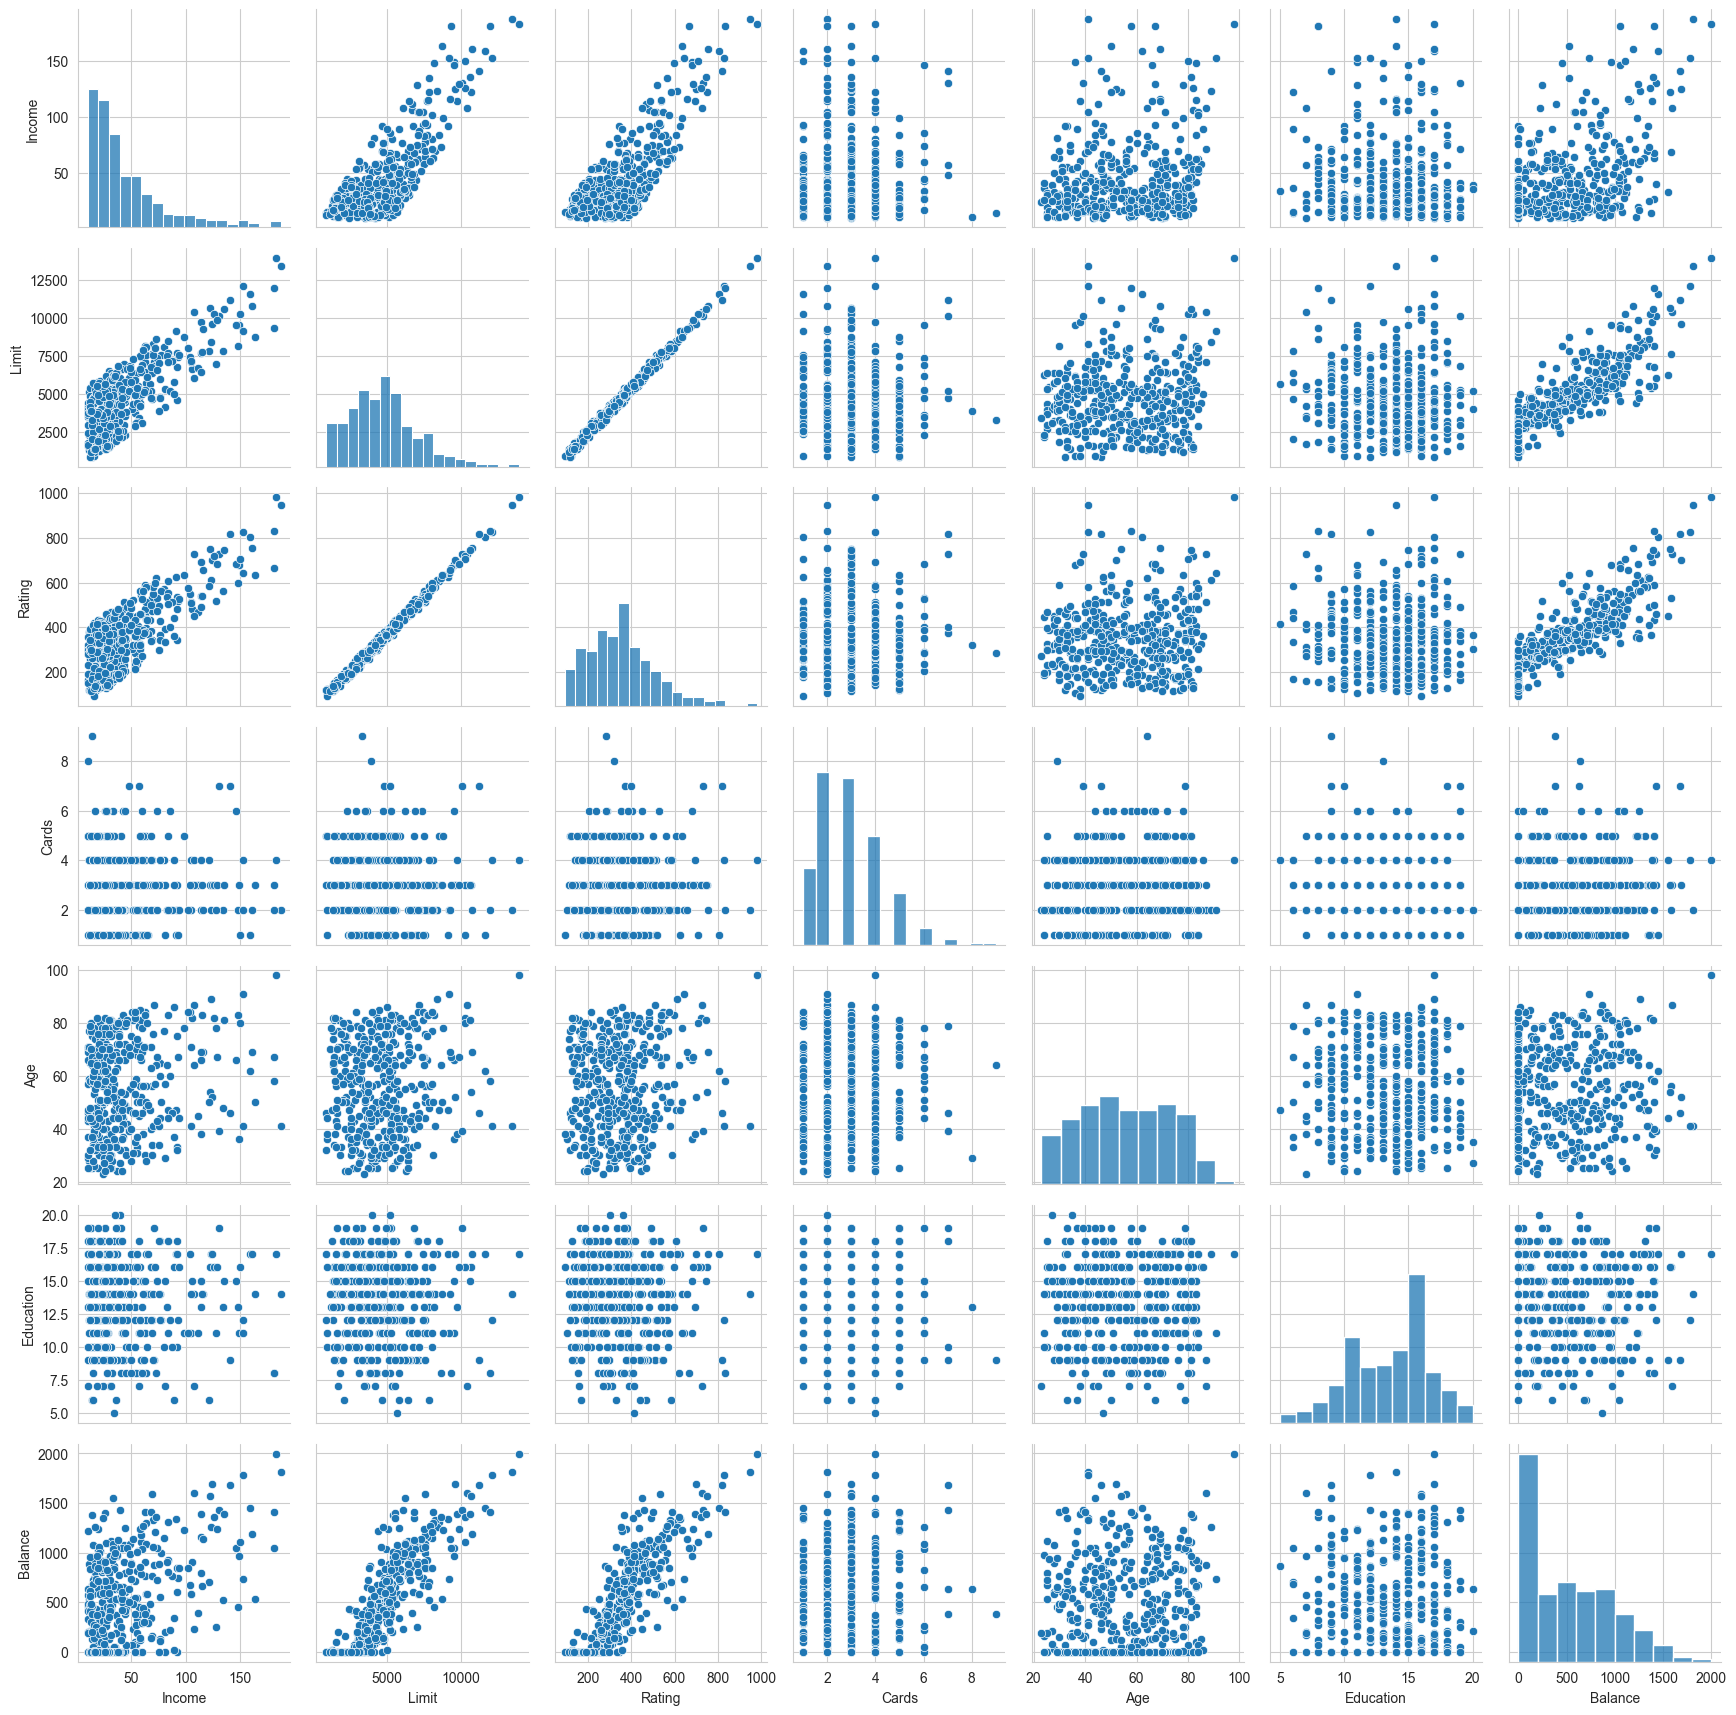

In [6]:
g = sns.PairGrid(credit)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

In [7]:
#Dummy 변수 생성

credit["Student_dummy"] = credit["Student"].replace(to_replace="Yes", value=0)
credit["Student_dummy"] = credit["Student_dummy"].replace(to_replace="No", value=1)

In [8]:
credit

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance,Student_dummy
0,14.891,3606,283,2,34,11,No,No,Yes,South,333,1
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903,0
2,104.593,7075,514,4,71,11,No,No,No,West,580,1
3,148.924,9504,681,3,36,11,Yes,No,No,West,964,1
4,55.882,4897,357,2,68,16,No,No,Yes,South,331,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,No,No,Yes,South,560,1
396,13.364,3838,296,5,65,17,No,No,No,East,480,1
397,57.872,4171,321,5,67,12,Yes,No,Yes,South,138,1
398,37.728,2525,192,1,44,13,No,No,Yes,South,0,1


**Balance(잔액)과 income, Student의 관계성 알아보기**

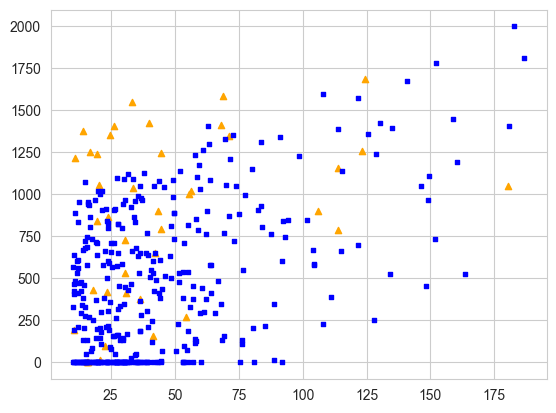

In [9]:
fig, ax = plt.subplots()
#학생인 경우와 학생이 아닌 경우의 row를 저장( 칼럼의 내용으로 구별해서 row를 나누서 저장)
income_student = credit[credit['Student'] == "Yes"]
income_non_student = credit[credit['Student'] == "No"]

ax.scatter(income_student["Income"], income_student["Balance"], s=20, marker="^", c="orange")
ax.scatter(income_non_student["Income"], income_non_student["Balance"], s=10, marker="s", c="blue")

F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Student', ylabel='Balance'>

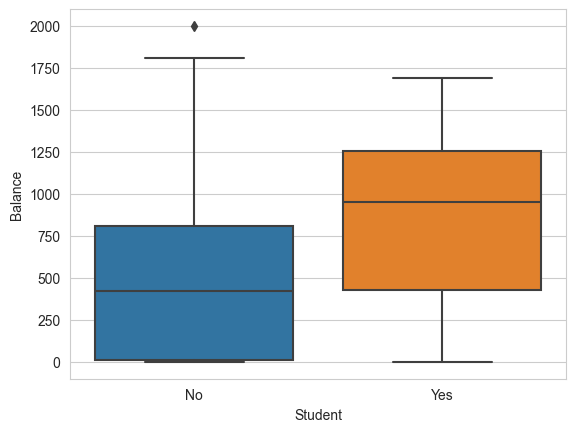

In [10]:
sns.boxplot(x=credit["Student"], y=credit["Balance"], data=credit)

**2 - Auto 데이터**

Auto 데이터 불러오기

In [12]:
# 데이터 loading
auto = pd.read_csv("data/Auto.csv")

In [13]:
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [14]:
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [15]:
auto.describe(include="all")

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
count,397.000000,397.000000,397.000000,397,397.000000,397.000000,397.000000,397.000000,397
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,304
top,NaN,NaN,NaN,150,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,6
mean,23.515869,5.458438,193.532746,NaN,2970.261965,15.555668,75.994962,1.574307,NaN
std,7.825804,1.701577,104.379583,NaN,847.904119,2.749995,3.690005,0.802549,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.000000,NaN,2223.000000,13.800000,73.000000,1.000000,NaN
50%,23.000000,4.000000,146.000000,NaN,2800.000000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,NaN,3609.000000,17.100000,79.000000,2.000000,NaN


F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

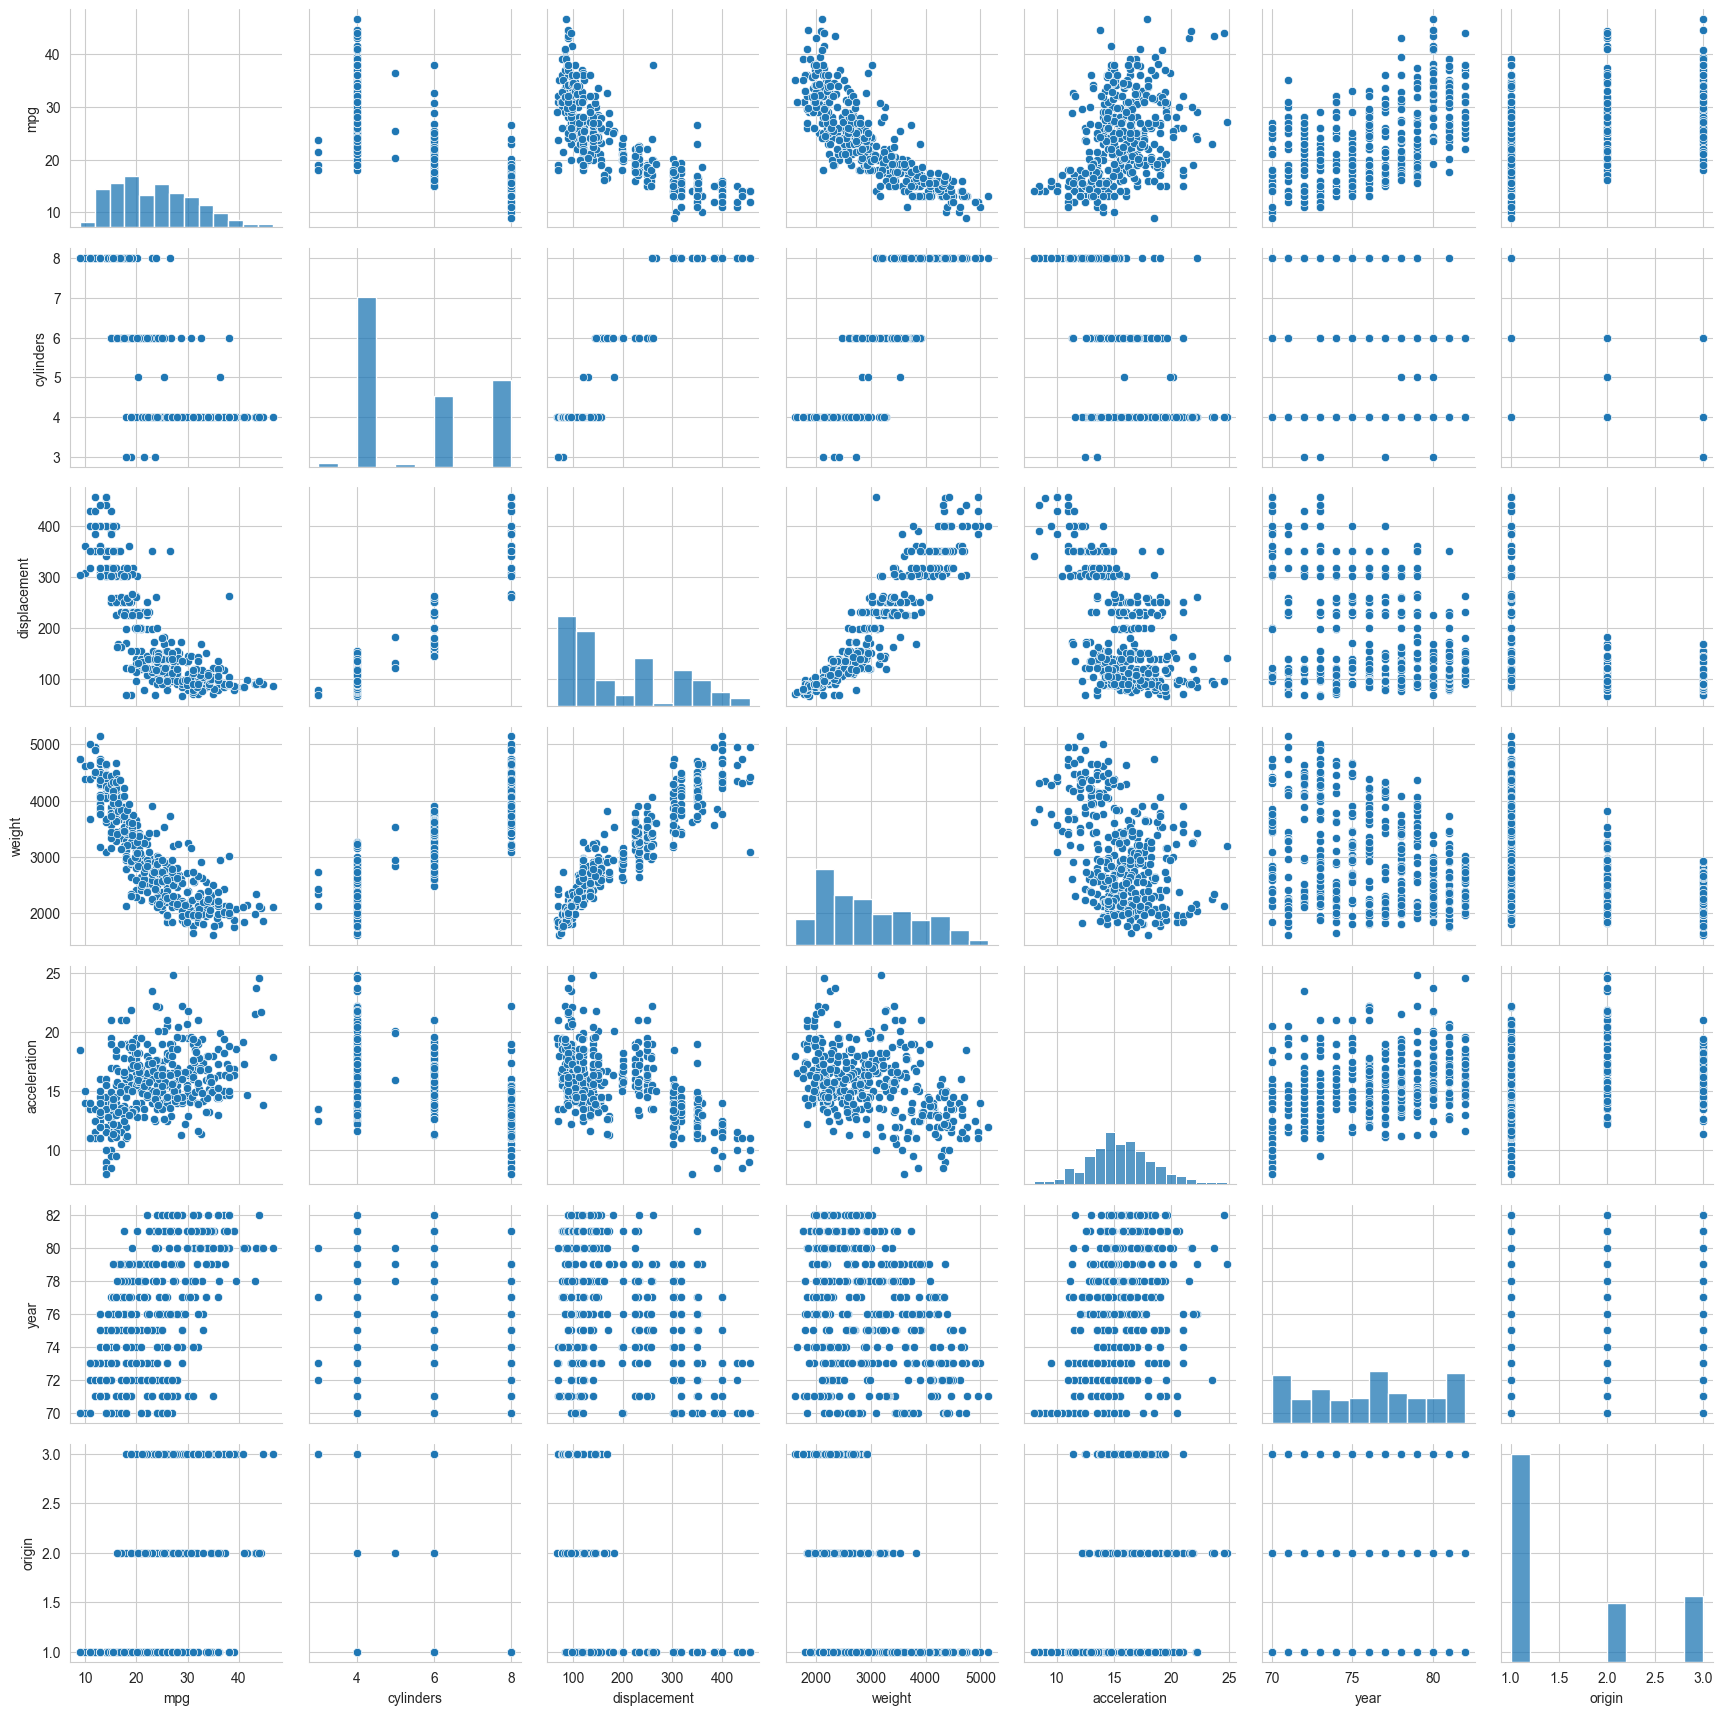

In [16]:
g = sns.PairGrid(auto)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

In [17]:
# ?표를 0으로 바꾼 후 horsepower 칼럼들을 숫자로 바꿈
auto["horsepower"] = (auto["horsepower"].replace(to_replace="?", value=0))
auto["horsepower"] = pd.to_numeric(auto["horsepower"])

mpg와 horsepower의 관계성

F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

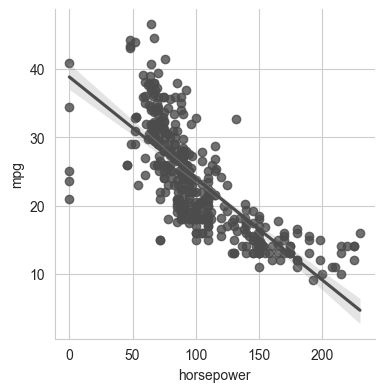

In [18]:
g = sns.PairGrid(auto, y_vars=["mpg"], x_vars=["horsepower"], height=4)
g.map(sns.regplot, color=".3")

**Income 데이터 불러오기**

In [19]:
# 데이터 loading 교육, 기간과 수입의 관계
# income = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/Income.csv")
income = pd.read_csv("data/Income.csv",
                     index_col=0)  # 컬럼 0번째를 index로 삼아라

In [20]:
income

,Education,Seniority,Income
1,21.586207,113.103448,99.917173
2,18.275862,119.310345,92.579135
3,12.068966,100.689655,34.678727
4,17.034483,187.586207,78.702806
5,19.931034,20.000000,68.009922
6,18.275862,26.206897,71.504485
7,19.931034,150.344828,87.970467
8,21.172414,82.068966,79.811030
9,20.344828,88.275862,90.006327
10,100.000000,113.103448,45.655530


In [21]:
income.dtypes

Education    float64
Seniority    float64
Income       float64
dtype: object

In [22]:
income.describe(include="all")

,Education,Seniority,Income
count,30.000000,30.000000,30.000000
mean,19.386207,93.862069,62.744733
std,15.648716,55.715623,27.013285
min,10.000000,20.000000,17.613593
25%,13.827586,44.827586,36.392043
50%,17.241379,94.482759,70.804791
75%,19.931034,133.275862,85.930608
max,100.000000,187.586207,99.917173


F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

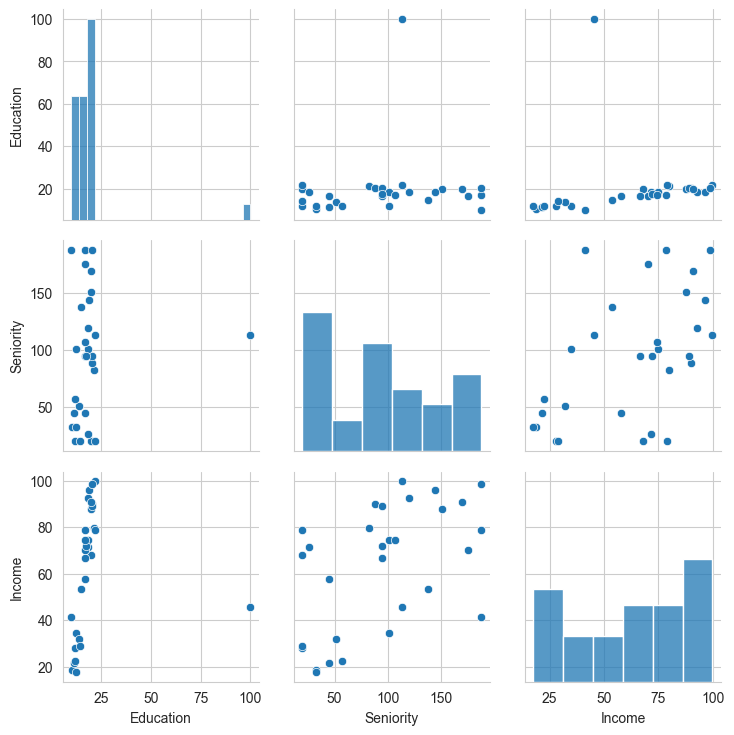

In [23]:
g = sns.PairGrid(income)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

**이상치(outlier) 수정/삭제하기**

In [24]:
#값변경 row, 칼럼 위치
income.loc[10, "Education"] = 10

In [25]:
# row 삭제
income = income.drop([10])



**imcome과 education seniority의 관계성 알아보기**



Text(0.5, 0, 'Income')

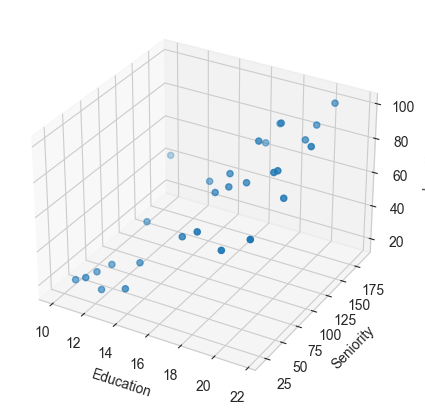

In [26]:
plt.figure(figsize=(6, 5))

axes = plt.axes(projection='3d')
axes.scatter3D(income["Education"], income["Seniority"], income["Income"])

axes.set_xlabel("Education")
axes.set_ylabel("Seniority")
axes.set_zlabel("Income")